In [1]:
# Convergent Cross Mapping
import pyEDM
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing

In [2]:
path = ''

filename = 'data/output_populations_3-1000-d-l.csv'
filename2 = 'data/output_pops_E.csv'
st = 100
ed = 1000

file = path+filename
df = (pd.read_csv(file, sep=",", header=0))[st:ed]

print(df.head(10))



iteration      1      2      3
100        101  16009  44330  16006
101        102  15402  46855  15357
102        103  14836  49025  14833
103        104  14525  49652  14536
104        105  14144  50390  14212
105        106  13836  50574  13916
106        107  13356  52003  13398
107        108  13028  52481  13098
108        109  12571  53214  12660
109        110  12089  54491  12186


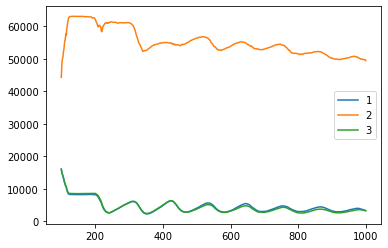

In [3]:
df[['1','2','3']].plot()

species_1  species_2  species_3
0   0.107720   0.026725   0.109644
1   0.103636   0.028248   0.105199
2   0.099828   0.029556   0.101609
3   0.097735   0.029934   0.099575
4   0.095171   0.030379   0.097355
5   0.093099   0.030490   0.095327
6   0.089869   0.031351   0.091779
7   0.087662   0.031639   0.089724
8   0.084587   0.032081   0.086724
9   0.081344   0.032851   0.083477


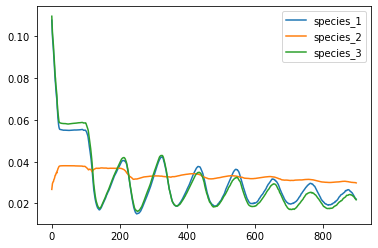

In [4]:
# Normalisation

norm_species_1 = preprocessing.normalize([np.array(df['1'])])
norm_species_2 = preprocessing.normalize([np.array(df['2'])])
norm_species_3 = preprocessing.normalize([np.array(df['3'])])
norm_df = pd.DataFrame({'species_1': norm_species_1[0], 'species_2': norm_species_2[0], 'species_3': norm_species_3[0]}, columns=['species_1', 'species_2', 'species_3'])
print(norm_df.head(10))
norm_df[['species_1','species_2','species_3']].plot()

species_1  species_2  species_3
0   5.804369  -2.728084   5.481563
1   5.497091  -2.091354   5.175579
2   5.210569  -1.544145   4.928530
3   5.053134  -1.386035   4.788503
4   4.860262  -1.199933   4.635747
5   4.704346  -1.153534   4.496192
6   4.461358  -0.793183   4.251971
7   4.295317  -0.672646   4.110531
8   4.063973  -0.487805   3.904027
9   3.819973  -0.165784   3.680551


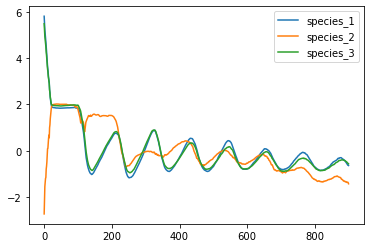

In [5]:
# Standardisation

data_df = pd.DataFrame({'species_1': df['1'], 'species_2': df['2'], 'species_3': df['3']})
col_names = data_df.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

scaled_df = scaler.fit_transform(data_df)
scaled_df = pd.DataFrame(scaled_df, columns=col_names)

print(scaled_df.head(10))
scaled_df[['species_1','species_2','species_3']].plot()
#scaled_df[['species_1','species_2']].plot()
#scaled_df[['1','4']].plot()

species_1  species_2  species_3
100   9.680906  10.699417   9.680719
101   9.642253  10.754813   9.639327
102   9.604812  10.800086   9.604610
103   9.583627  10.812794   9.584384
104   9.557046  10.827548   9.561842
105   9.535029  10.831193   9.540795
106   9.499721  10.859057   9.502861
107   9.474856  10.868206   9.480215
108   9.439148  10.882077   9.446203
109   9.400051  10.905791   9.408043


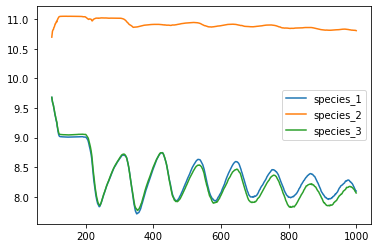

In [6]:
# Log-Transformation

logged_df = np.log(data_df)
print(logged_df.head(10))
logged_df[['species_1','species_2','species_3']].plot()

CCM Request Received


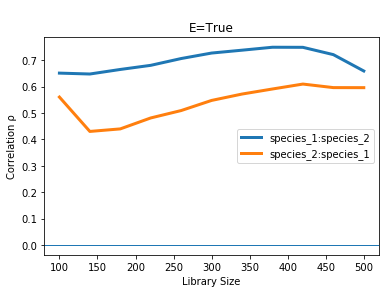

,LibSize,species_1:species_2,species_2:species_1
0,100.0,0.651159,0.560359
1,140.0,0.647781,0.430123
2,180.0,0.665031,0.439751
3,220.0,0.680646,0.481223
4,260.0,0.706413,0.509270
5,300.0,0.727217,0.547643
6,340.0,0.738074,0.571824
7,380.0,0.749222,0.591005
8,420.0,0.748905,0.609667
9,460.0,0.721222,0.596240


In [7]:
# Embeding Dimension

# total_rows = ed-st
# lib_str = str(0) + ' ' + str(int(total_rows*0.5)) 
# pred_str = str(int(total_rows*0.5)+1) + ' ' + str(total_rows)
# print(lib_str)
# print(pred_str)
# filtered_df = scaled_df.filter(items=[i for i in range(1000) if i%10==0], axis=0)
# filtered_df.reset_index(inplace=True)
# print(filtered_df.head(10))

scaled_df.reset_index(inplace=True)

#pyEDM.EmbedDimension(dataFrame=scaled_df, lib="0 500", pred="600 800", columns="1" )
#pyEDM.EmbedDimension(dataFrame=scaled_df, lib=lib_str, pred=pred_str, columns="2" )
pyEDM.CCM(dataFrame=scaled_df, E=True, columns="species_1", target="species_2", libSizes="100 500 40", showPlot=True, sample=100, verbose=True)

CCM Request Received


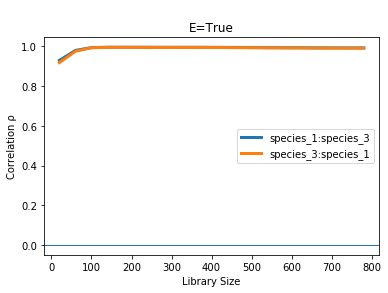

,LibSize,species_1:species_3,species_3:species_1
0,20.0,0.930074,0.918899
1,60.0,0.980199,0.975992
2,100.0,0.994511,0.993810
3,140.0,0.996149,0.995592
4,180.0,0.996249,0.995750
5,220.0,0.996178,0.995705
6,260.0,0.995946,0.995388
7,300.0,0.995935,0.995264
8,340.0,0.995902,0.995289
9,380.0,0.995890,0.995233


In [8]:
pyEDM.CCM(dataFrame=scaled_df, E=True, columns="species_1", target="species_3", libSizes="20 800 40", showPlot=True, sample=100, verbose=True)

CCM Request Received


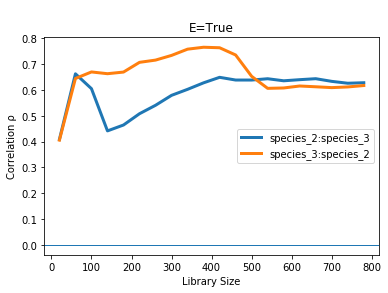

,LibSize,species_2:species_3,species_3:species_2
0,20.0,0.408314,0.405538
1,60.0,0.662347,0.644266
2,100.0,0.604824,0.669564
3,140.0,0.441389,0.662764
4,180.0,0.464165,0.669108
5,220.0,0.507906,0.706753
6,260.0,0.540495,0.715433
7,300.0,0.578994,0.733583
8,340.0,0.602264,0.757757
9,380.0,0.627470,0.765183


In [9]:
pyEDM.CCM(dataFrame=scaled_df, E=True, columns="species_2", target="species_3", libSizes="20 800 40", showPlot=True, sample=100, verbose=True)